<a href="https://colab.research.google.com/github/KC-Night/knn_assignment/blob/main/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


In [4]:
! git clone https://github.com/KC-Night/knn_assignment.git

Cloning into 'knn_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 854.44 KiB | 10.42 MiB/s, done.


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Q1:1

In [5]:
# Predicting a numeric outcome is called regression, and predicting a categorical outcome is called classification

Q1:2

In [6]:
# A table used for classification that tells us whether a model has done well or poorly by comparing predicted outcomes to actual outcomes

Q1:3

In [7]:
# The SSE is the sum of square errors, it quantifies the unexplained variance in a model

Q1:4

In [8]:
# Overfitting is when a model is unrealistically precise (k is too small). Underfitting is when your model is unrealistically imprecise (k is too large)

Q1:5

In [9]:
# By splitting the data, you can test the model with training data and make sure it runs properly. Afterwards, when you believe the model is complete, then you can use testing sets to evaluate the model's performance using data it's never seen before. This process helps refine the model.

Q1:6

In [10]:
# Reporting a class label as a prediction means you assign a single class outcome to that prediction. They're much easier to use and simplier to understand compared to probabilities, but you loose out on some information and it's inflexible
# Reporting a class label as a probability means you look at the likelihood of each class outcome. They're more nuanced and flexible, but can be more complex to evaluate and may have overconfidence issues with some probability outputs

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Q2:1

In [12]:
cars_df= pd.read_csv('knn_assignment/data/USA_cars_datasets.csv')
cars_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [20]:
newcar_df= cars_df[['price', 'year', 'mileage']]
newcar_df.shape
newcar_df.head()
#no na

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


Q2:2

In [22]:
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

newcar_df['year'] = maxmin(newcar_df['year'])
newcar_df['mileage'] = maxmin(newcar_df['mileage'])
newcar_df.head()

/tmp/ipython-input-1671498591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcar_df['year'] = maxmin(newcar_df['year'])
/tmp/ipython-input-1671498591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcar_df['mileage'] = maxmin(newcar_df['mileage'])


,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


Q2:3

In [35]:
from sklearn.model_selection import train_test_split

X = newcar_df[['year', 'mileage']]
y = newcar_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

          year   mileage
109   0.957447  0.048624
2296  0.957447  0.053728
354   0.765957  0.177186
266   0.978723  0.015502
2102  0.957447  0.068256
...        ...       ...
1638  1.000000  0.023561
1095  0.978723  0.006159
1130  0.978723  0.029745
1294  0.978723  0.017232
860   0.957447  0.006629

[1999 rows x 2 columns]
          year   mileage
2319  0.893617  0.037284
1865  0.978723  0.028412
902   0.851064  0.160383
2240  0.978723  0.030490
1285  0.978723  0.013229
...        ...       ...
2054  0.893617  0.065909
1860  0.936170  0.041546
1862  0.978723  0.024431
1151  0.978723  0.017206
461   0.978723  0.030008

[500 rows x 2 columns]
109     23100
2296     8000
354         0
266     17100
2102    16300
        ...  
1638    20000
1095    21000
1130    23300
1294    23200
860     21500
Name: price, Length: 1999, dtype: int64
2319    11390
1865    27900
902      2500
2240    10900
1285    23600
        ...  
2054    17150
1860    29000
1862    51000
1151    25300
461      5800
Nam

Q2:4

[2.32976667e+04 2.67666667e+04 4.96666667e+03 1.81000000e+04
 3.03000000e+04 2.71333333e+04 2.73666667e+04 6.58333333e+03
 2.12333333e+04 2.72600000e+04 2.24476667e+04 1.12500000e+04
 1.99166667e+04 2.14326667e+04 1.67276667e+04 1.48433333e+04
 1.93833333e+04 1.99333333e+04 3.06000000e+04 1.66333333e+04
 1.54733333e+04 3.20006667e+04 2.75666667e+04 2.01333333e+04
 3.20006667e+04 4.92666667e+04 2.06666667e+04 2.79666667e+04
 1.10333333e+04 4.92000000e+03 1.13133333e+04 3.67000000e+04
 3.97666667e+04 1.63333333e+04 1.56600000e+04 2.28666667e+04
 1.49833333e+04 1.71000000e+04 2.65333333e+04 2.69386667e+04
 1.69673333e+04 1.69673333e+04 3.06633333e+04 1.83416667e+04
 3.63626667e+04 2.57333333e+04 2.51006667e+04 1.88000000e+04
 7.34666667e+03 1.34500000e+04 2.14866667e+04 3.25000000e+02
 2.22000000e+04 2.55683333e+04 8.00000000e+03 3.41666667e+02
 1.43300000e+04 2.27333333e+04 2.73666667e+04 2.64700000e+04
 2.95000000e+04 2.91666667e+04 1.38806667e+04 3.90000000e+03
 2.28000000e+04 1.416666

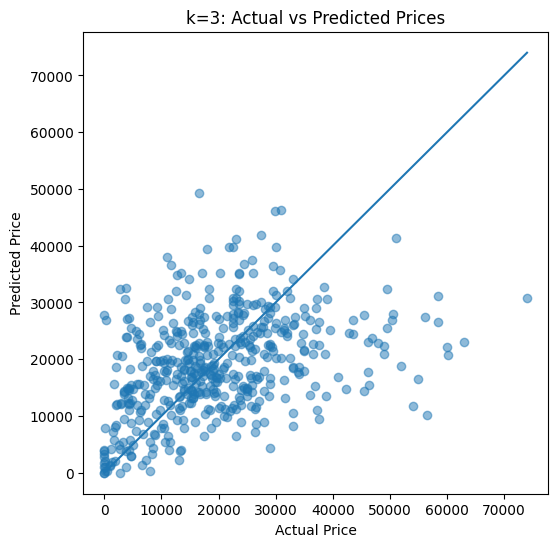

[2.15907e+04 2.54800e+04 5.01500e+03 1.87900e+04 2.65900e+04 1.93400e+04
 2.23400e+04 9.80980e+03 1.59060e+04 2.33120e+04 1.69368e+04 9.80980e+03
 1.64348e+04 2.15907e+04 1.68246e+04 1.78850e+04 1.91180e+04 1.40400e+04
 2.50400e+04 1.98900e+04 1.83552e+04 2.18555e+04 2.60000e+04 2.32202e+04
 2.21246e+04 2.53780e+04 1.96000e+04 2.15500e+04 1.23610e+04 5.13100e+03
 2.09851e+04 3.13000e+04 2.76100e+04 1.23040e+04 1.02275e+04 2.28600e+04
 1.23050e+04 3.03105e+04 1.48440e+04 2.70416e+04 1.80405e+04 1.90656e+04
 2.42032e+04 1.78218e+04 3.13376e+04 3.05500e+04 3.03311e+04 1.91200e+04
 1.14435e+04 1.23710e+04 2.03817e+04 2.45000e+02 2.46020e+04 2.55316e+04
 7.04000e+03 1.82000e+03 2.10822e+04 2.59500e+04 2.25300e+04 2.25701e+04
 2.29964e+04 2.26102e+04 1.33672e+04 7.05020e+03 2.03512e+04 1.01125e+04
 1.77800e+04 2.50650e+04 2.82900e+04 8.35000e+03 2.27038e+04 1.75052e+04
 1.35190e+04 2.79200e+04 2.15800e+04 1.97800e+04 3.20832e+04 2.22100e+04
 1.94200e+04 1.82000e+03 2.95863e+04 1.42930e+04 7.

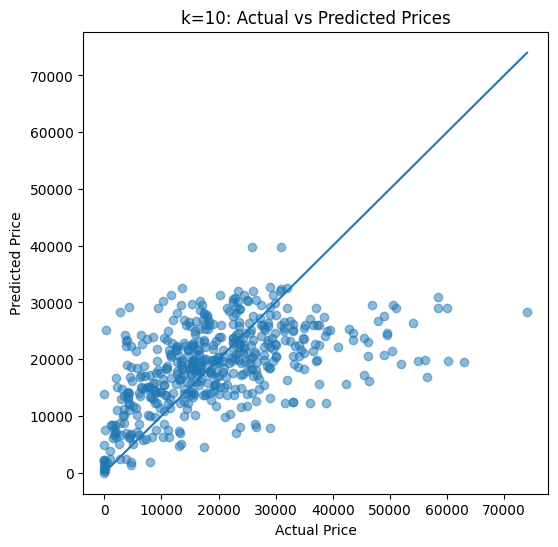

[23308.16 23964.    6896.   19100.   26716.   21388.   20172.    9489.92
 18438.4  25148.76 15949.16  9489.92 15483.92 23308.16 14632.32 17177.04
 20427.2  13031.4  24674.   18524.   17524.96 24750.28 27840.   22928.16
 23746.28 26530.76 19020.   20568.   13872.4   6661.4  24086.28 28264.24
 23852.   13829.2  12561.4  17553.6  13255.   27974.04 15331.2  27482.6
 17318.84 17318.84 25426.6  15854.8  30453.52 28585.28 27945.76 19293.6
 13793.4  14368.4  17998.68  1025.   26905.48 28237.24  7753.8   2032.2
 22800.96 22873.6  20172.   22488.48 19336.16 21744.48 13887.8   9814.48
 23469.56  7562.4  19304.16 21744.48 26571.2   6958.4  21527.84 16129.08
 12862.6  28758.   20331.2  19181.6  29577.28 19930.   18810.4   2115.2
 26941.   12820.4   7176.   15093.6  15300.4  27109.12 14872.28 15090.4
 17720.24 14927.92 23395.28 25286.52  7068.   13793.4  25577.36 19648.4
 24674.   26911.92 20984.   14250.   19857.6  27256.44 13912.6  15344.
 13799.88 19648.92 14154.72  9075.96 25426.6  22960.8   609

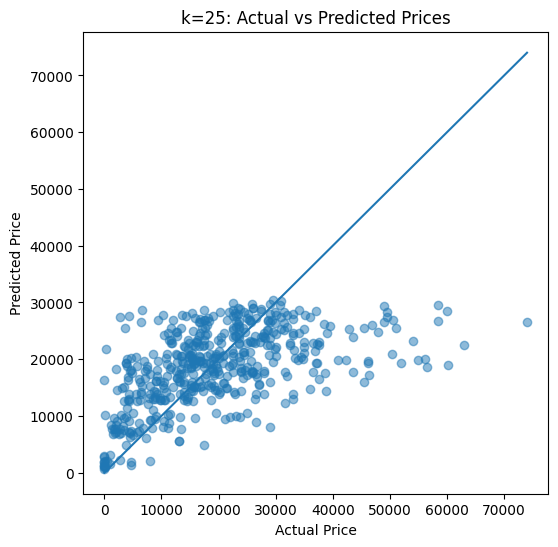

[20565.6  21594.    7090.2  18991.2  25726.64 22372.   19621.    8721.64
 18805.2  26363.7  16295.24  8770.64 14746.36 20565.6  12932.7  17600.02
 20347.2  11879.84 26869.   19139.2  17377.82 26363.52 27106.6  23968.12
 26133.52 26359.7  19498.2  19793.   14054.04  6996.06 26495.52 25970.64
 26256.5  14366.38 12105.2  17918.2  13528.62 27247.06 18098.2  25980.64
 18706.28 18337.04 25425.56 16625.88 27869.9  28351.64 25593.3  21252.
 14707.74 16847.14 16015.24  1560.6  27709.   27501.7   8176.88  4434.5
 21571.76 22907.4  20365.   23101.44 16657.26 25011.24 14599.6   9878.22
 23659.44  9649.46 18327.12 22792.5  25876.8   6650.68 21326.52 15907.38
 14031.8  27225.6  20857.6  20274.   28449.64 20525.6  18379.2   4413.
 24769.4  13897.64  7558.3  13985.48 14821.2  25591.8  15013.82 14654.2
 18802.06 13040.6  24477.68 26401.74  7363.22 14505.84 24913.26 19816.2
 26869.   27503.7  22212.   12493.72 21354.   26820.5  14520.5  15488.96
 13673.66 20189.94 14398.56 10473.64 27880.2  24569.38  70

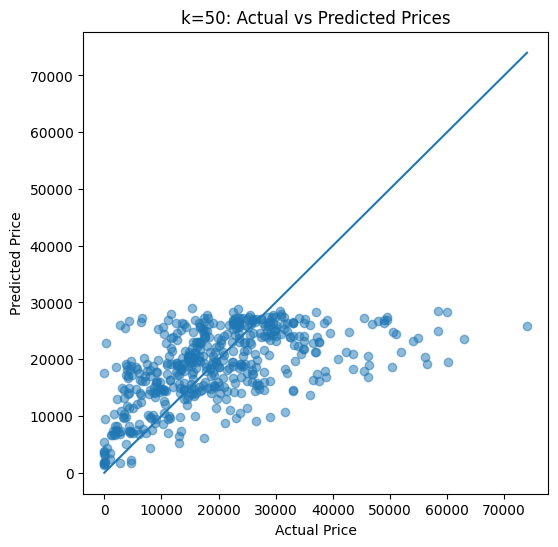

[19763.06 20186.6   8099.64 19680.7  25054.22 21816.   21009.1   9241.87
 19953.6  23048.67 17223.79  9241.87 14976.28 19724.96 13182.82 17591.
 21785.6  13367.13 25976.34 19550.7  17783.77 26882.1  25131.02 23630.14
 26793.1  23945.07 19330.7  20828.1  13666.    6734.53 26762.1  27270.19
 26053.61 14879.68 13183.21 16521.8  12738.56 27474.25 16435.3  23516.07
 19069.99 18868.99 24324.28 18785.05 24194.51 26605.98 25450.71 21463.1
 16388.77 15276.22 15990.52  3288.89 25890.34 27084.53  8480.87  5679.02
 20241.21 21441.87 21009.1  25403.77 15372.76 23732.47 15617.92 10524.51
 24122.11  9095.28 17241.23 24833.45 25072.02  6661.25 20788.78 17594.22
 15542.08 25347.02 21843.6  21593.1  26343.98 21838.2  19955.7   5918.82
 21246.9  15487.76  8754.21 13518.81 14881.18 26689.01 16700.79 14555.18
 18446.83 13270.32 23015.86 23516.07  7456.81 16278.77 25234.71 19031.1
 25976.34 26905.53 21776.1  12796.04 21599.1  25432.08 16227.08 14828.98
 14256.48 19296.77 14934.28 11749.36 24324.28 22724.87 

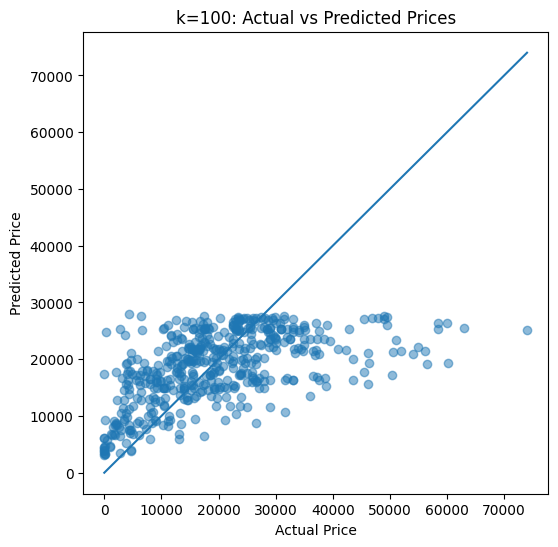

[18307.62333333 21522.28        9456.6        21573.18666667
 26528.10333333 20868.76666667 21137.84       10357.93666667
 21673.52       21174.40333333 17042.25       10321.32
 17046.88333333 18345.29       14985.79333333 18400.08
 20880.76666667 14130.59666667 26530.75666667 21557.85333333
 18254.41333333 26245.19666667 26530.75666667 23743.03666667
 26186.19666667 22166.57666667 21425.85333333 21229.17333333
 14867.80333333  9114.19333333 26231.19666667 25893.51333333
 26298.06333333 14653.84333333 13678.05333333 16866.91666667
 13023.40666667 26184.36333333 17096.79333333 23296.14666667
 17576.67666667 17605.11       21051.65       17078.64
 20922.42333333 26530.75666667 25177.44       21058.
 18117.71666667 17814.4        17764.29        7447.44666667
 25453.64333333 25739.37        9532.46666667  8167.66
 19196.82       19622.68333333 21137.84       26604.84
 15436.78       21531.41       15552.38666667 12709.27333333
 20741.35       10338.89666667 16858.36       21599.83333333
 

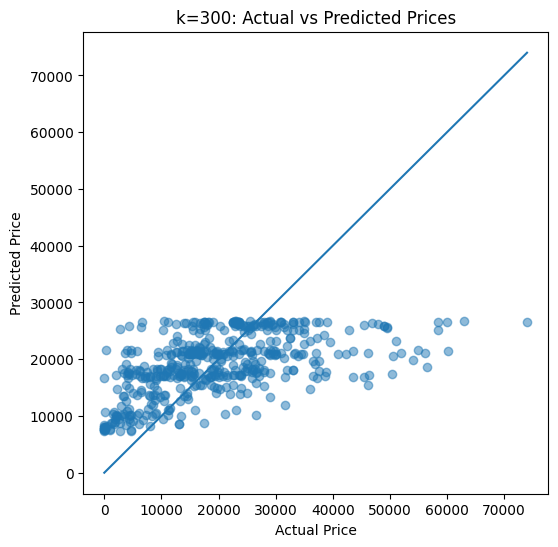

In [61]:
# As k increases, the predicted prices start to level out around 30000
from sklearn.neighbors import KNeighborsRegressor
k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train, y_train)
    y_pred = fitted_model.predict(X_test)
    print(y_pred)
    mse = np.mean((y_test - y_pred) ** 2)
    print(f"k={k}, Mean Squared Error={mse:.2f}")

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k={k}: Actual vs Predicted Prices")
    plt.show()

Q2:5

In [61]:
# Optimal k: k = 50

Q2:6

In [ ]:
# For smaller values of k, the models closely followed the training data, capturing local fluctuations, which can lead to overfitting.
# For larger values of k, the predictions became more averaged and less sensitive to individual data points, resulting in underfitting.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.